In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


# PARTE I: Entendiendo los datos

In [3]:
datos_modelo = pd.read_csv("../datos/csv/datos_modelo_completo_2025.csv")
datos_modelo.head(10)

,gan_plant_8715,aptitud_forVII_lingue,bn_lingue_87,cul_prad_lingue_87,dem_lingue,dis_caminos_lingue,dis_comunidades_lingue,dis_hid_lingue,dis_plant87_lingue,dis_urbano_lingue,mat_lingue_87,pen_lingue15,pend_lingue,predios_lingue1,x,y
0,0,1.0,0,0,12,657.951355,3725.802002,30.000000,30.000000,14155.200200,1,1,1.317252,1665.00000,668113.6539,5629240.000
1,0,0.0,0,1,21,90.000000,8842.267578,60.000000,218.403290,24050.066410,0,1,8.836393,42.00000,678016.3896,5638572.578
2,0,0.0,0,0,259,67.082039,1368.210449,660.000000,283.019440,8565.197266,0,1,8.757495,18.00000,663072.2612,5632690.953
3,0,0.0,0,1,6,30.000000,258.069763,708.025452,201.246124,5342.527344,0,1,5.334463,38.00000,659441.2581,5631100.514
4,0,1.0,1,0,384,1072.054077,8141.670410,450.000000,84.852814,14301.727540,0,0,31.360552,1590.00000,667873.5876,5638542.570
5,0,1.0,0,0,210,2172.671143,2558.280762,2455.239258,228.473190,7209.993164,1,0,51.308601,28.00000,661361.7887,5635691.782
6,0,1.0,1,0,590,3210.000000,18882.230470,2344.802734,60.000000,30146.656250,0,1,13.549136,2494.65332,680627.1108,5648595.347
7,0,0.0,0,0,198,876.184937,872.066528,882.326477,241.867737,8020.330566,1,0,29.478197,45.00000,662412.0788,5631760.696
8,0,1.0,1,0,392,1323.064575,4659.957031,120.000000,150.000000,9312.234375,0,0,32.587006,786.00000,659741.3410,5624798.773
9,0,0.0,1,0,426,2787.418213,6162.572754,445.982056,123.693169,12473.435550,0,0,19.582354,1590.00000,666733.2726,5635961.857


# Número de filas y columnas

In [4]:
datos_modelo.shape

(818, 16)

# Type de dato de cada columna

In [5]:
datos_modelo.dtypes

gan_plant_8715              int64
aptitud_forVII_lingue     float64
bn_lingue_87                int64
cul_prad_lingue_87          int64
dem_lingue                  int64
dis_caminos_lingue        float64
dis_comunidades_lingue    float64
dis_hid_lingue            float64
dis_plant87_lingue        float64
dis_urbano_lingue         float64
mat_lingue_87               int64
pen_lingue15                int64
pend_lingue               float64
predios_lingue1           float64
x                         float64
y                         float64
dtype: object

# Hay datos na


In [12]:
datos_modelo.isna().sum()

gan_plant_8715             0
aptitud_forVII_lingue     37
bn_lingue_87               0
cul_prad_lingue_87         0
dem_lingue                 0
dis_caminos_lingue         0
dis_comunidades_lingue     0
dis_hid_lingue             0
dis_plant87_lingue         0
dis_urbano_lingue          0
mat_lingue_87              0
pen_lingue15               0
pend_lingue                0
predios_lingue1            8
x                          0
y                          0
dtype: int64

In [13]:
datos_modelo.isnull().sum(axis = 0)

gan_plant_8715             0
aptitud_forVII_lingue     37
bn_lingue_87               0
cul_prad_lingue_87         0
dem_lingue                 0
dis_caminos_lingue         0
dis_comunidades_lingue     0
dis_hid_lingue             0
dis_plant87_lingue         0
dis_urbano_lingue          0
mat_lingue_87              0
pen_lingue15               0
pend_lingue                0
predios_lingue1            8
x                          0
y                          0
dtype: int64

# El nombre de las columnas 

In [14]:
datos_modelo.columns

Index(['gan_plant_8715', 'aptitud_forVII_lingue', 'bn_lingue_87', 'cul_prad_lingue_87', 'dem_lingue', 'dis_caminos_lingue', 'dis_comunidades_lingue', 'dis_hid_lingue', 'dis_plant87_lingue', 'dis_urbano_lingue', 'mat_lingue_87', 'pen_lingue15', 'pend_lingue', 'predios_lingue1', 'x', 'y'], dtype='object')

# ETAPA II: Preparación de los datos

In [15]:
datos_modelo.head(4)

,gan_plant_8715,aptitud_forVII_lingue,bn_lingue_87,cul_prad_lingue_87,dem_lingue,dis_caminos_lingue,dis_comunidades_lingue,dis_hid_lingue,dis_plant87_lingue,dis_urbano_lingue,mat_lingue_87,pen_lingue15,pend_lingue,predios_lingue1,x,y
0,0,1.0,0,0,12,657.951355,3725.802002,30.000000,30.000000,14155.200200,1,1,1.317252,1665.0,668113.6539,5629240.000
1,0,0.0,0,1,21,90.000000,8842.267578,60.000000,218.403290,24050.066410,0,1,8.836393,42.0,678016.3896,5638572.578
2,0,0.0,0,0,259,67.082039,1368.210449,660.000000,283.019440,8565.197266,0,1,8.757495,18.0,663072.2612,5632690.953
3,0,0.0,0,1,6,30.000000,258.069763,708.025452,201.246124,5342.527344,0,1,5.334463,38.0,659441.2581,5631100.514


# Seleccionamos las columnas que nos interesan

In [16]:
datos_modelo = datos_modelo[['gan_plant_8715', 'aptitud_forVII_lingue', 'bn_lingue_87',
       'cul_prad_lingue_87', 'dem_lingue', 'dis_caminos_lingue',
       'dis_comunidades_lingue', 'dis_hid_lingue', 'dis_plant87_lingue',
       'dis_urbano_lingue', 'mat_lingue_87', 'pen_lingue15', 'pend_lingue',
       'predios_lingue1' #'x', 'y'
       ]].copy()

# Verificamos si hay  datos NA, y cuantos hay por cada variable

In [17]:
(datos_modelo
    .isna()
    .sum()
)

gan_plant_8715             0
aptitud_forVII_lingue     37
bn_lingue_87               0
cul_prad_lingue_87         0
dem_lingue                 0
dis_caminos_lingue         0
dis_comunidades_lingue     0
dis_hid_lingue             0
dis_plant87_lingue         0
dis_urbano_lingue          0
mat_lingue_87              0
pen_lingue15               0
pend_lingue                0
predios_lingue1            8
dtype: int64

Eliminamos las 37 columnas con los datos NA

In [18]:
datos_modelo = datos_modelo.dropna()
datos_modelo.isna().sum()

gan_plant_8715            0
aptitud_forVII_lingue     0
bn_lingue_87              0
cul_prad_lingue_87        0
dem_lingue                0
dis_caminos_lingue        0
dis_comunidades_lingue    0
dis_hid_lingue            0
dis_plant87_lingue        0
dis_urbano_lingue         0
mat_lingue_87             0
pen_lingue15              0
pend_lingue               0
predios_lingue1           0
dtype: int64

In [19]:
datos_modelo.shape

(776, 14)

# Verificamos el tipo de dato de cada columna

In [20]:
datos_modelo.dtypes

gan_plant_8715              int64
aptitud_forVII_lingue     float64
bn_lingue_87                int64
cul_prad_lingue_87          int64
dem_lingue                  int64
dis_caminos_lingue        float64
dis_comunidades_lingue    float64
dis_hid_lingue            float64
dis_plant87_lingue        float64
dis_urbano_lingue         float64
mat_lingue_87               int64
pen_lingue15                int64
pend_lingue               float64
predios_lingue1           float64
dtype: object

# Creamos una pequeña función para transformar las variables desde int64 a category y la aplicamos a cada columna 

In [21]:
def transform_to_category(df,variable):      
    return  df[variable].astype("category")
    

In [22]:
list_variables = ["gan_plant_8715","bn_lingue_87", "aptitud_forVII_lingue","cul_prad_lingue_87", "mat_lingue_87", "pen_lingue15"]

for variable in list_variables:
    datos_modelo[variable] =  transform_to_category(datos_modelo,variable)


In [23]:
datos_modelo.dtypes

gan_plant_8715            category
aptitud_forVII_lingue     category
bn_lingue_87              category
cul_prad_lingue_87        category
dem_lingue                   int64
dis_caminos_lingue         float64
dis_comunidades_lingue     float64
dis_hid_lingue             float64
dis_plant87_lingue         float64
dis_urbano_lingue          float64
mat_lingue_87             category
pen_lingue15              category
pend_lingue                float64
predios_lingue1            float64
dtype: object

# Verificamos las transformaciones con describe. Se mostraran solo loo datos continuos

In [24]:
datos_modelo.describe().T
#CAMBIAR NOMBRE PREDIOS PARA RECORDAR QUE SON HECTAREAS

,count,mean,std,min,25%,50%,75%,max
dem_lingue,776.0,212.310567,167.369678,4.000000,72.000000,182.500000,322.250000,727.000000
dis_caminos_lingue,776.0,1045.248169,922.504138,0.000000,308.868897,792.022705,1537.481659,4893.311523
dis_comunidades_lingue,776.0,6674.094343,5289.172088,94.868332,2356.050659,4621.642822,10792.094240,20051.515630
dis_hid_lingue,776.0,1100.750572,962.003489,0.000000,362.491394,833.814392,1604.993714,5068.846191
dis_plant87_lingue,776.0,116.059375,91.757407,30.000000,42.426407,90.000000,161.554947,660.681457
dis_urbano_lingue,776.0,18242.557763,7905.311148,234.307495,12592.164550,19034.875980,24049.112793,34673.941410
pend_lingue,776.0,27.819292,17.305509,0.589093,14.762611,25.903334,37.877568,98.690201
predios_lingue1,776.0,642.886679,689.473885,2.000000,67.326420,274.759354,1148.000000,2494.653320


In [25]:
datos_modelo.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
dem_lingue,776.0,212.31,167.37,4.00,72.00,182.50,322.25,727.00
dis_caminos_lingue,776.0,1045.25,922.50,0.00,308.87,792.02,1537.48,4893.31
dis_comunidades_lingue,776.0,6674.09,5289.17,94.87,2356.05,4621.64,10792.09,20051.52
dis_hid_lingue,776.0,1100.75,962.00,0.00,362.49,833.81,1604.99,5068.85
dis_plant87_lingue,776.0,116.06,91.76,30.00,42.43,90.00,161.55,660.68
dis_urbano_lingue,776.0,18242.56,7905.31,234.31,12592.16,19034.88,24049.11,34673.94
pend_lingue,776.0,27.82,17.31,0.59,14.76,25.90,37.88,98.69
predios_lingue1,776.0,642.89,689.47,2.00,67.33,274.76,1148.00,2494.65


In [26]:
datos_modelo.describe(include ="all").round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gan_plant_8715,776.0,2.0,1.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aptitud_forVII_lingue,776.0,2.0,1.0,606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bn_lingue_87,776.0,2.0,0.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cul_prad_lingue_87,776.0,2.0,0.0,546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dem_lingue,776.0,NaN,NaN,NaN,212.31,167.37,4.00,72.00,182.50,322.25,727.00
dis_caminos_lingue,776.0,NaN,NaN,NaN,1045.25,922.50,0.00,308.87,792.02,1537.48,4893.31
dis_comunidades_lingue,776.0,NaN,NaN,NaN,6674.09,5289.17,94.87,2356.05,4621.64,10792.09,20051.52
dis_hid_lingue,776.0,NaN,NaN,NaN,1100.75,962.00,0.00,362.49,833.81,1604.99,5068.85
dis_plant87_lingue,776.0,NaN,NaN,NaN,116.06,91.76,30.00,42.43,90.00,161.55,660.68
dis_urbano_lingue,776.0,NaN,NaN,NaN,18242.56,7905.31,234.31,12592.16,19034.88,24049.11,34673.94


In [27]:
datos_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 0 to 817
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gan_plant_8715          776 non-null    category
 1   aptitud_forVII_lingue   776 non-null    category
 2   bn_lingue_87            776 non-null    category
 3   cul_prad_lingue_87      776 non-null    category
 4   dem_lingue              776 non-null    int64   
 5   dis_caminos_lingue      776 non-null    float64 
 6   dis_comunidades_lingue  776 non-null    float64 
 7   dis_hid_lingue          776 non-null    float64 
 8   dis_plant87_lingue      776 non-null    float64 
 9   dis_urbano_lingue       776 non-null    float64 
 10  mat_lingue_87           776 non-null    category
 11  pen_lingue15            776 non-null    category
 12  pend_lingue             776 non-null    float64 
 13  predios_lingue1         776 non-null    float64 
dtypes: category(6), float64(7), int

# Evaluamos si hay datos duplicados



In [28]:
datos_modelo.loc[datos_modelo.duplicated()]

,gan_plant_8715,aptitud_forVII_lingue,bn_lingue_87,cul_prad_lingue_87,dem_lingue,dis_caminos_lingue,dis_comunidades_lingue,dis_hid_lingue,dis_plant87_lingue,dis_urbano_lingue,mat_lingue_87,pen_lingue15,pend_lingue,predios_lingue1


# ETAPA III. Escalar los datos

Existen distintas aproximaciones para escalar los datos, y estos métodos muchas veces estan relacionados con los requerimientos de los algoritmos que se utilizarán en etapas posteriores. En un extremo encontramos que los algoritmos de la familia de los árboles de decisión no necesitan escalados, y por contrario, las redes neuronales requieren datos que esten en un rango entre 0 y 1 (confirmar), y otros algoritmos se benefician de datos estandarizados donde la media este centrada y la desviación estandar ... 

Los métodos más utilizados para esto es el estandar scaler y minmax


In [29]:
std = StandardScaler()
datos_modelo_std = pd.DataFrame(std.fit_transform(datos_modelo), columns = std.feature_names_in_)

In [30]:
datos_modelo_std.head()

,gan_plant_8715,aptitud_forVII_lingue,bn_lingue_87,cul_prad_lingue_87,dem_lingue,dis_caminos_lingue,dis_comunidades_lingue,dis_hid_lingue,dis_plant87_lingue,dis_urbano_lingue,mat_lingue_87,pen_lingue15,pend_lingue,predios_lingue1
0,-1.007762,0.529649,-0.920662,-0.649034,-1.197587,-0.420103,-0.557780,-1.113760,-0.938506,-0.517373,2.042874,1.720228,-1.532410,1.483410
1,-1.007762,-1.888043,-0.920662,1.540751,-1.143779,-1.036163,0.410191,-1.082555,1.116094,0.735108,-0.489506,1.720228,-1.097636,-0.872077
2,-1.007762,-1.888043,-0.920662,-0.649034,0.279140,-1.061022,-1.003807,-0.458455,1.820755,-1.224949,-0.489506,1.720228,-1.102198,-0.906908
3,-1.007762,-1.888043,-0.920662,1.540751,-1.233459,-1.101245,-1.213831,-0.408500,0.928990,-1.632871,-0.489506,1.720228,-1.300125,-0.877882
4,-1.007762,0.529649,1.086175,-0.649034,1.026471,0.029077,0.277647,-0.676890,-0.340318,-0.498826,-0.489506,-0.581318,0.204764,1.374561


In [31]:
minmax = MinMaxScaler()
datos_modelo_minmax = pd.DataFrame(minmax.fit_transform(datos_modelo), columns = minmax.feature_names_in_)

In [32]:
datos_modelo_minmax.head(10)

,gan_plant_8715,aptitud_forVII_lingue,bn_lingue_87,cul_prad_lingue_87,dem_lingue,dis_caminos_lingue,dis_comunidades_lingue,dis_hid_lingue,dis_plant87_lingue,dis_urbano_lingue,mat_lingue_87,pen_lingue15,pend_lingue,predios_lingue1
0,0.0,1.0,0.0,0.0,0.011065,0.134459,0.181941,0.005919,0.000000,0.404211,1.0,1.0,0.007423,0.667161
1,0.0,0.0,0.0,1.0,0.023513,0.018392,0.438320,0.011837,0.298730,0.691522,0.0,1.0,0.084069,0.016047
2,0.0,0.0,0.0,0.0,0.352697,0.013709,0.063805,0.130207,0.401184,0.241898,0.0,1.0,0.083265,0.006419
3,0.0,0.0,0.0,1.0,0.002766,0.006131,0.008178,0.139682,0.271526,0.148324,0.0,1.0,0.048372,0.014442
4,0.0,1.0,1.0,0.0,0.525588,0.219086,0.403214,0.088778,0.086974,0.408466,0.0,0.0,0.313671,0.637072
5,0.0,1.0,0.0,0.0,0.284924,0.444008,0.123438,0.484378,0.314696,0.202548,1.0,0.0,0.517013,0.010431
6,0.0,1.0,1.0,0.0,0.810512,0.655997,0.941409,0.462591,0.047568,0.868544,0.0,1.0,0.132109,1.000000
7,0.0,0.0,0.0,0.0,0.268326,0.179058,0.038944,0.174069,0.335935,0.226077,1.0,0.0,0.294483,0.017251
8,0.0,1.0,1.0,0.0,0.536653,0.270382,0.228750,0.023674,0.190270,0.263590,0.0,0.0,0.326173,0.314524
9,0.0,0.0,1.0,0.0,0.583679,0.569638,0.304044,0.087985,0.148559,0.355379,0.0,0.0,0.193609,0.637072


## Analizar los valores atipicos.

NameError: name 'kwargs' is not defined

La documentación de seaborn para hacer boxplot esta en esta página.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [50]:
import sys
sys.path.append(r'C:\Users\Cristian\Documents\github\location_factors')


In [77]:
from outliers import outliers_iqr, count_outliers, count_outliers_wide

In [82]:
datos_continuos_sel = ['dem_lingue', 'dis_caminos_lingue', 'dis_comunidades_lingue', 'dis_hid_lingue', 'dis_plant87_lingue', 'dis_urbano_lingue','pend_lingue', 'predios_lingue1']

In [84]:
datos_continuos = datos_modelo_minmax[datos_continuos_sel]

<Axes: >

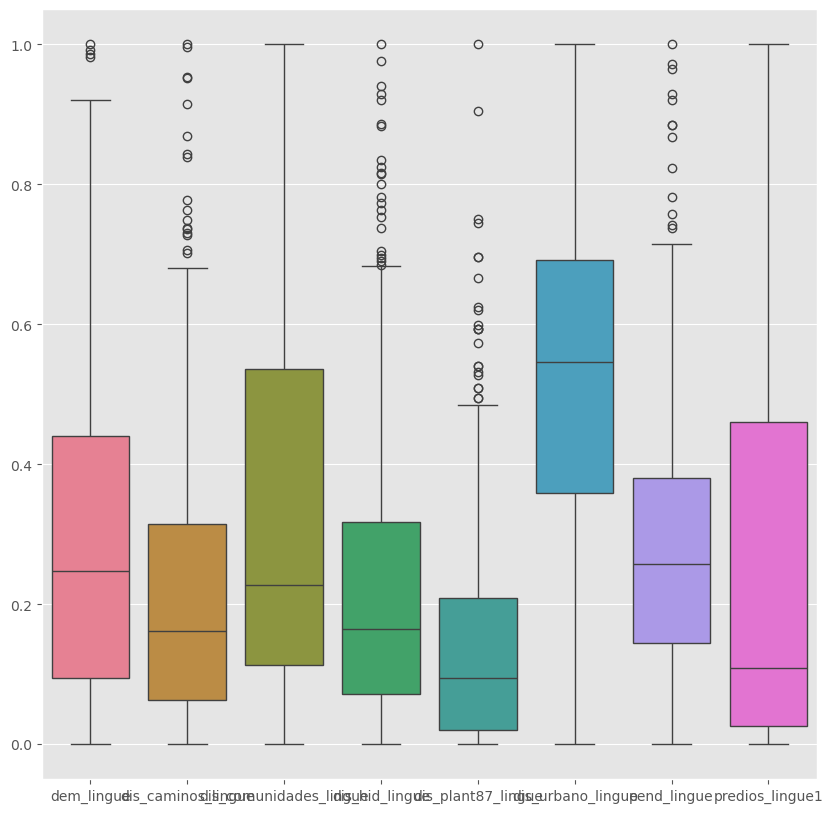

In [86]:

plt.figure(figsize = (10,10))
sns.boxplot(data=datos_continuos, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, dodge='auto', width=0.8, gap=0, whis=1.5, linecolor='auto', linewidth=None, fliersize=None, hue_norm=None, native_scale=False, log_scale=None, formatter=None, legend='auto', ax=None)

# Gráficas de violín

https://medium.com/ironhack/data-visualization-con-pandas-y-seaborn-1044906af34f

https://seaborn.pydata.org/generated/seaborn.violinplot.html
https://raymondltremblay.github.io/Visualizacion_Datos/G8_geom_boxplot_geom_violin.html
https://interactivechaos.com/es/powerbi/visual/violin-plot

<Axes: >

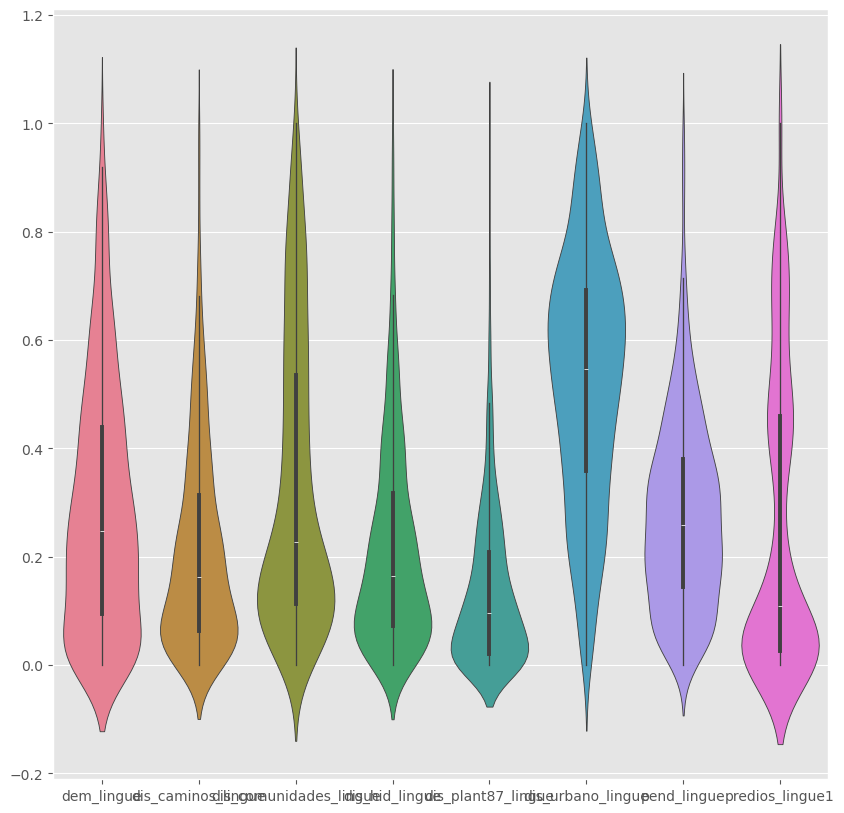

In [91]:
plt.figure(figsize = (10,10))
sns.violinplot(data=datos_continuos, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, inner='box', split=False, width=0.8, dodge='auto', gap=0, linewidth=None, linecolor='auto', cut=2, gridsize=100, bw_method='scott', bw_adjust=1, density_norm='area', common_norm=False, hue_norm=None, formatter=None, log_scale=None, native_scale=False, legend='auto' , inner_kws=None, ax=None)

In [72]:
outliers_st = outliers_iqr(datos_continuos)

In [87]:
count_outliers(outliers_st)

,Outliers_Count
dem_lingue,4
dis_caminos_lingue,17
dis_comunidades_lingue,0
dis_hid_lingue,22
dis_plant87_lingue,22
dis_urbano_lingue,0
pend_lingue,13
predios_lingue1,0


In [88]:
outliers_st.head(2)

,dem_lingue,dis_caminos_lingue,dis_comunidades_lingue,dis_hid_lingue,dis_plant87_lingue,dis_urbano_lingue,pend_lingue,predios_lingue1
0,tipico,tipico,tipico,tipico,tipico,tipico,tipico,tipico
1,tipico,tipico,tipico,tipico,tipico,tipico,tipico,tipico


# Parte IV: Análisis de distribuciones de datos continuos

In [27]:
col_to_plot = ['dem_lingue','dis_caminos_lingue', 'dis_comunidades_lingue',
                        'dis_hid_lingue', 'dis_plant87_lingue',
                        'dis_urbano_lingue', 'predios_lingue1','gan_plant_8715']

In [28]:
col_to_plot_dist = ['dis_caminos_lingue', 'dis_comunidades_lingue',
                        'dis_hid_lingue', 'dis_plant87_lingue',
                        'dis_urbano_lingue']

In [30]:
# https://www.youtube.com/watch?v=D5DPZyge31g

## Podemos hace un scatterplotmatrix usando las funciones incorporadas en pandas

In [31]:
#pd.plotting.scatter_matrix(datos_modelo_minmax[col_to_plot_dist], figsize=(15, 15), marker='o',
  #                               hist_kwds={'bins': 20}, s=60, alpha=.8)

O podemos igualmente evaluar las distribuciones haciendo una gráfica para cada variable

<Axes: ylabel='Frequency'>

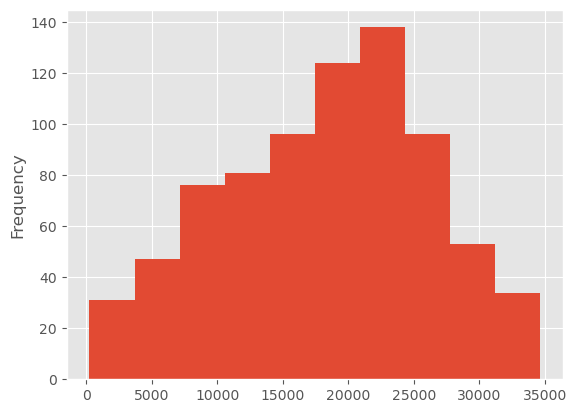

In [32]:
datos_modelo["dis_urbano_lingue"].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

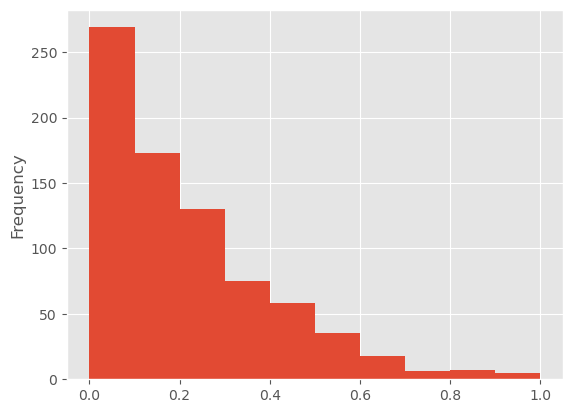

In [33]:
datos_modelo_minmax["dis_hid_lingue"].plot(kind= 'hist')

# Utilizando la la libreria Seaborn se puden lograr facilmente atractivas visualizaciones

https://seaborn.pydata.org/tutorial/distributions.html

In [ ]:
col_to_plot = ['dem_lingue','dis_caminos_lingue', 'dis_comunidades_lingue',
                        'dis_hid_lingue', 'dis_plant87_lingue',
                        'dis_urbano_lingue', 'predios_lingue1','gan_plant_8715']

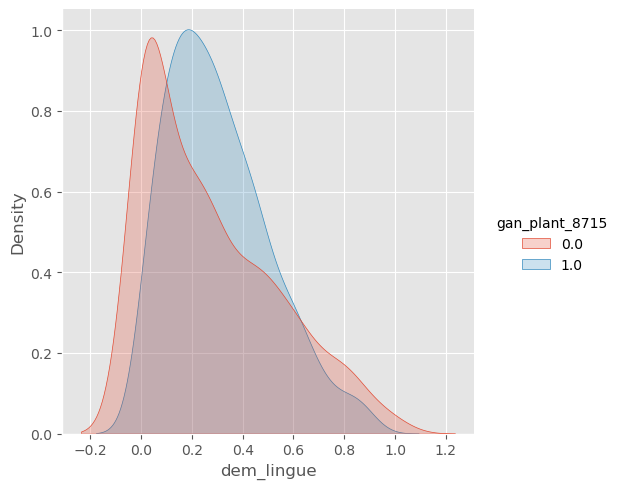

In [36]:
sns.displot(datos_modelo_minmax, x="dem_lingue", kind="kde", hue = 'gan_plant_8715',fill=True)

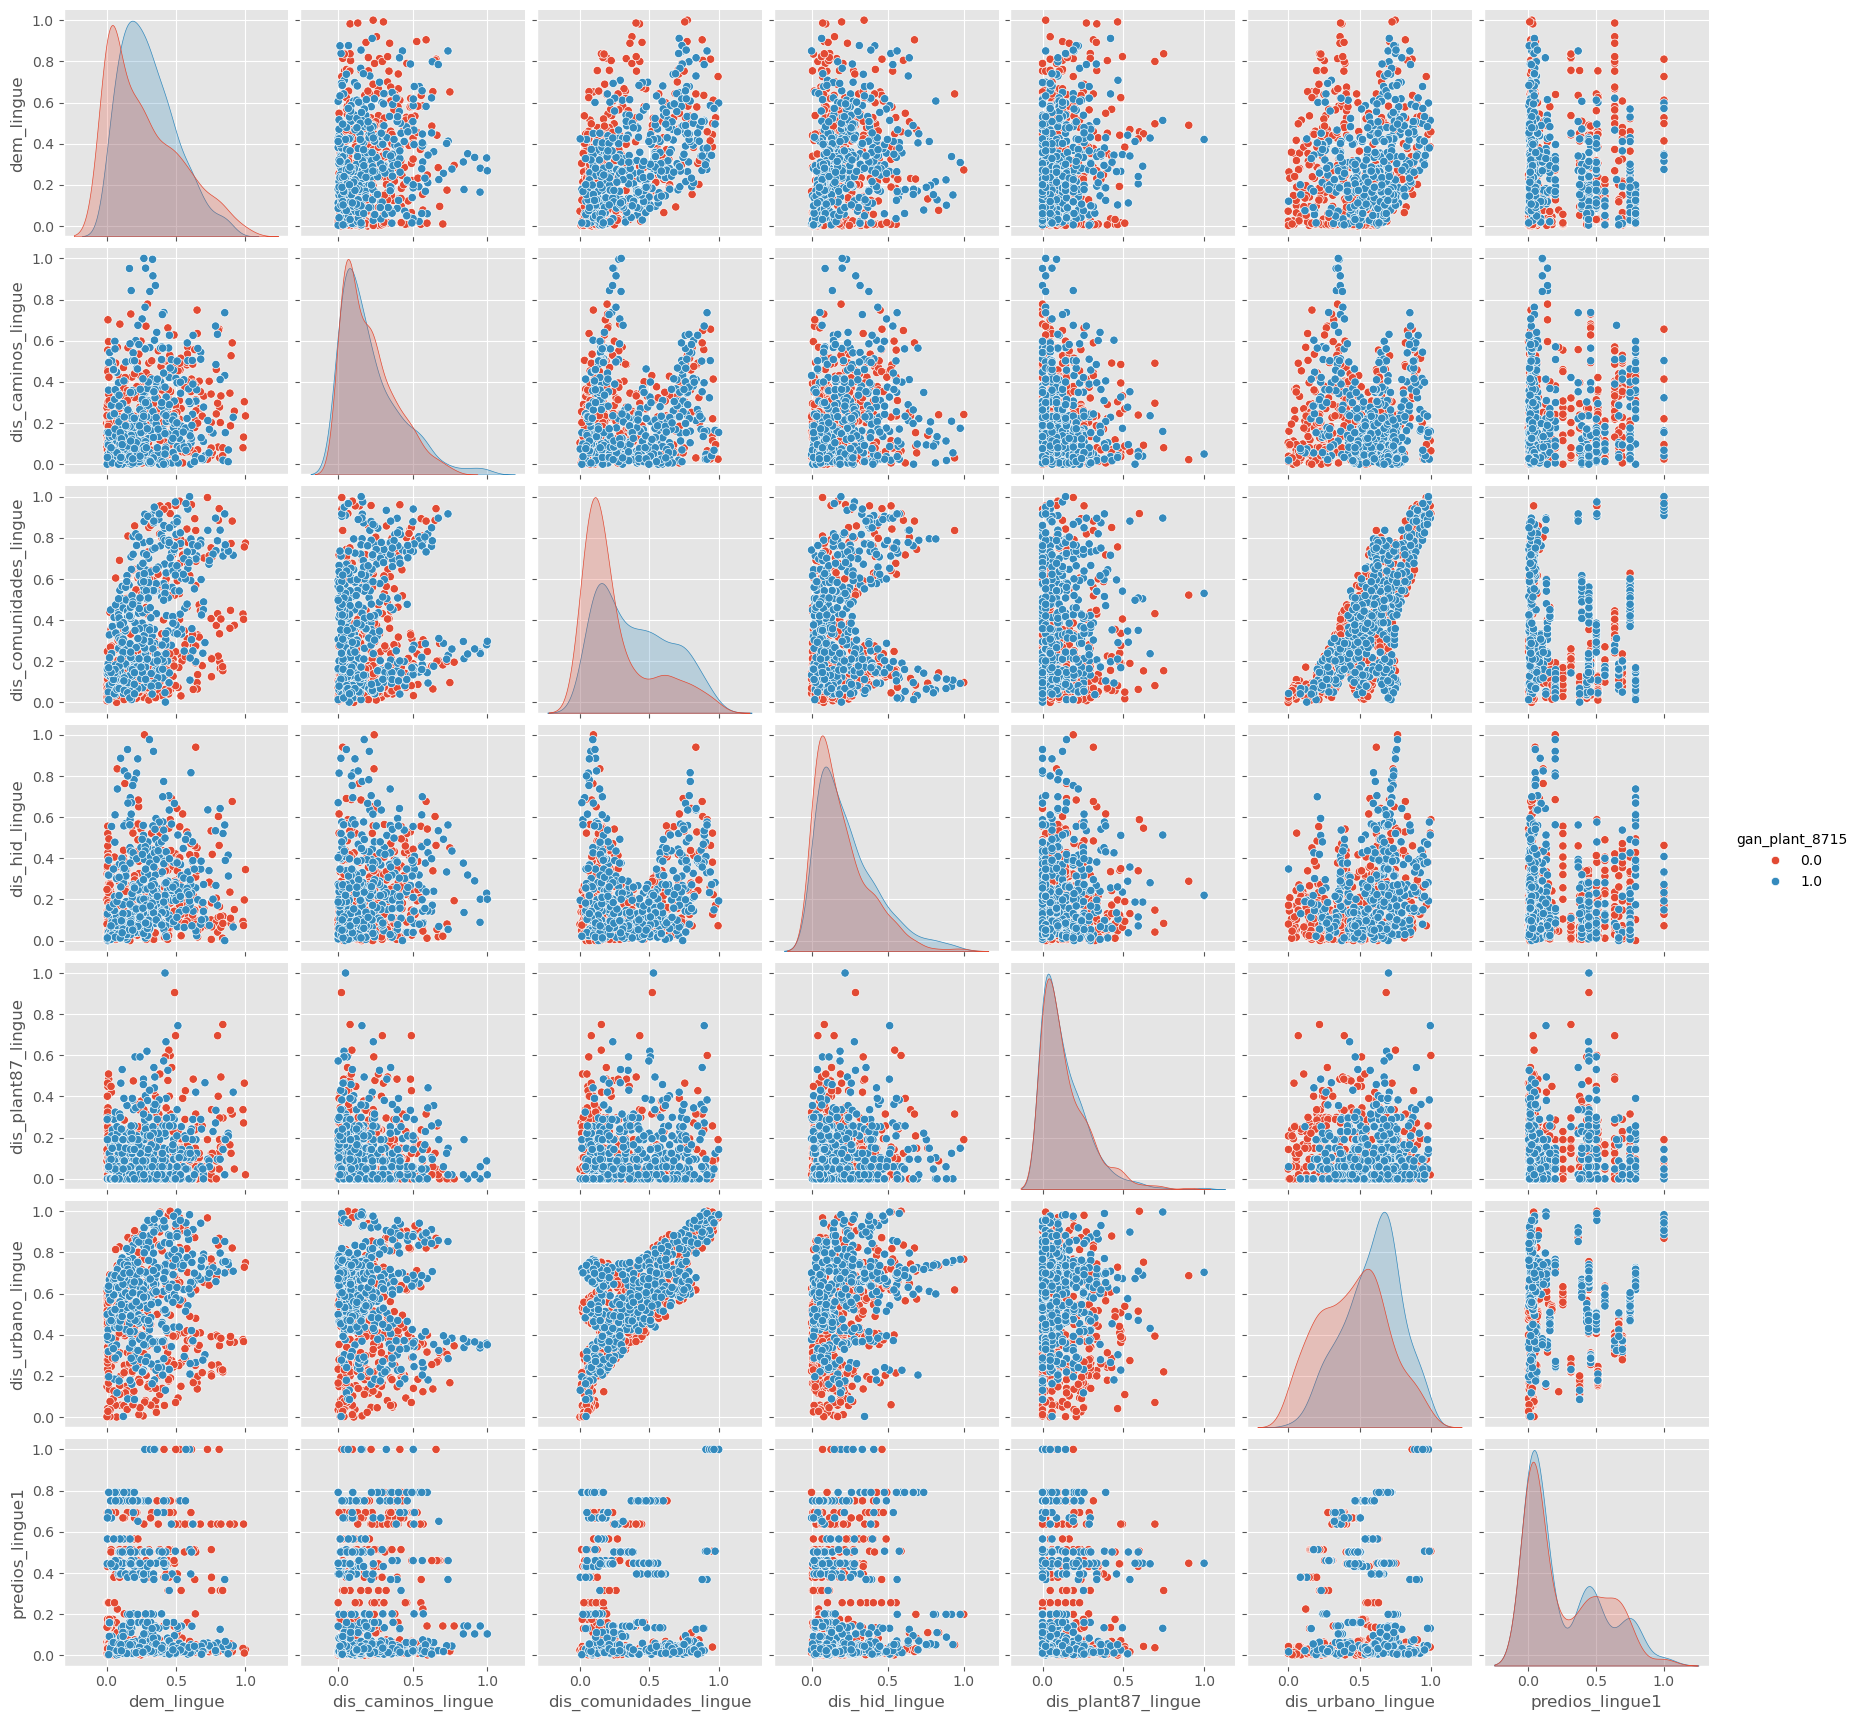

In [37]:
sns.pairplot(datos_modelo_minmax[col_to_plot], hue = 'gan_plant_8715')

# Es importante evaluar la correlación entre las variables continuas

In [58]:
col_to_corr = ['dem_lingue','dis_caminos_lingue', 'dis_comunidades_lingue',
                        'dis_hid_lingue', 'dis_plant87_lingue',
                        'dis_urbano_lingue', 'predios_lingue1']

In [ ]:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

matriz_correlacion = datos_modelo_minmax[col_to_corr].corr()

https://www.datacamp.com/tutorial/seaborn-heatmaps

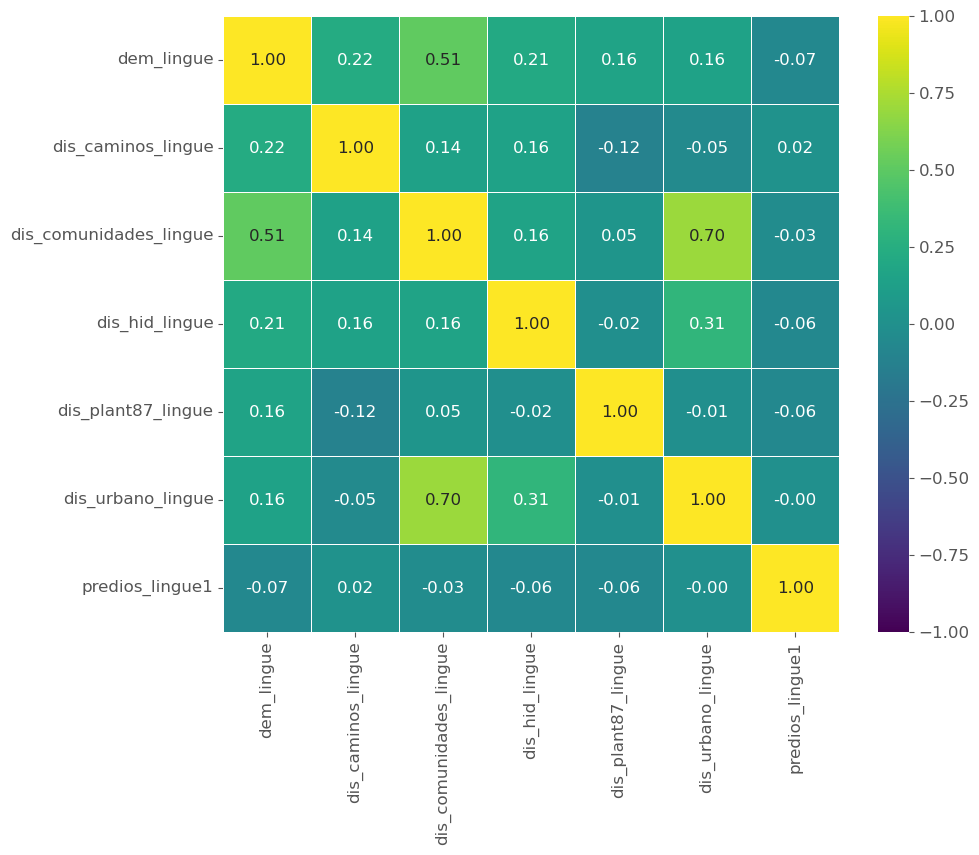

In [60]:
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(matriz_correlacion, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

Correlaciones son bajas excepto por distancia a las comunidades y las distancia a centros urbanos, por lo tanto probablemente una de ellas puede eliminarse. (Justificar con alguna cita explicar el fenómeno y los efectos)

# Análisis de variables categoricas

## Calculamos la frecuencia de cada variable categorica

In [ ]:
for col in ['mat_lingue_87', 'bn_lingue_87', 'gan_plant_8715', "cul_prad_lingue_87","pen_lingue15", "aptitud_forVII_lingue"]:
    print(f'\n{col}')
    print(datos_modelo[col].value_counts(normalize=True))  # porcentaje

In [62]:
datos_modelo['gan_plant_8715'].value_counts()

gan_plant_8715
1    391
0    385
Name: count, dtype: int64

In [63]:
datos_modelo.dtypes

gan_plant_8715            category
aptitud_forVII_lingue     category
bn_lingue_87              category
cul_prad_lingue_87        category
dem_lingue                   int64
dis_caminos_lingue         float64
dis_comunidades_lingue     float64
dis_hid_lingue             float64
dis_plant87_lingue         float64
dis_urbano_lingue          float64
mat_lingue_87             category
pen_lingue15              category
pend_lingue                float64
predios_lingue1            float64
dtype: object

Podemos igualmente representar esto de forma gráfica.

gan_plant_8715
1    391
0    385
Name: count, dtype: int64

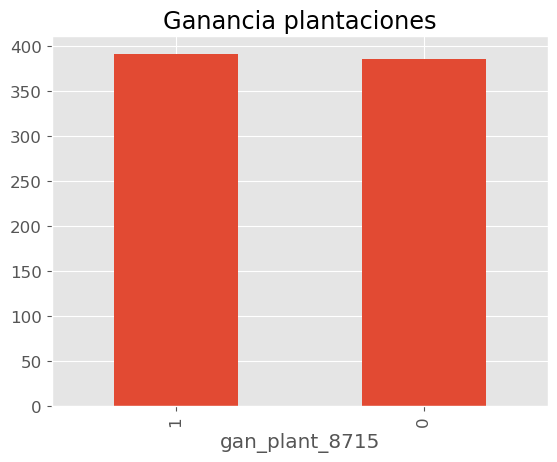

In [64]:
datos_modelo['gan_plant_8715'].value_counts().plot(kind = 'bar', title = 'Ganancia plantaciones')
datos_modelo['gan_plant_8715'].value_counts()

pen_lingue15
0    580
1    196
Name: count, dtype: int64

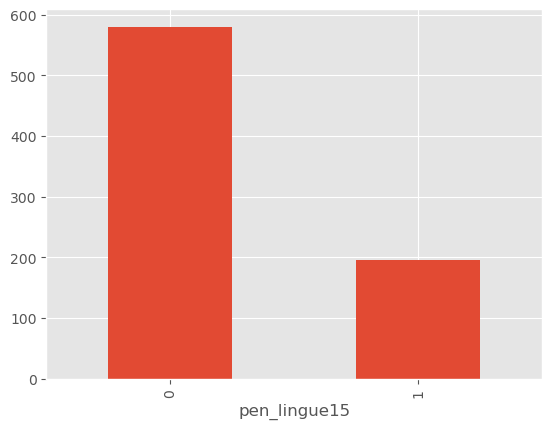

In [37]:
datos_modelo["pen_lingue15"].value_counts().plot(kind = 'bar')
datos_modelo["pen_lingue15"].value_counts()

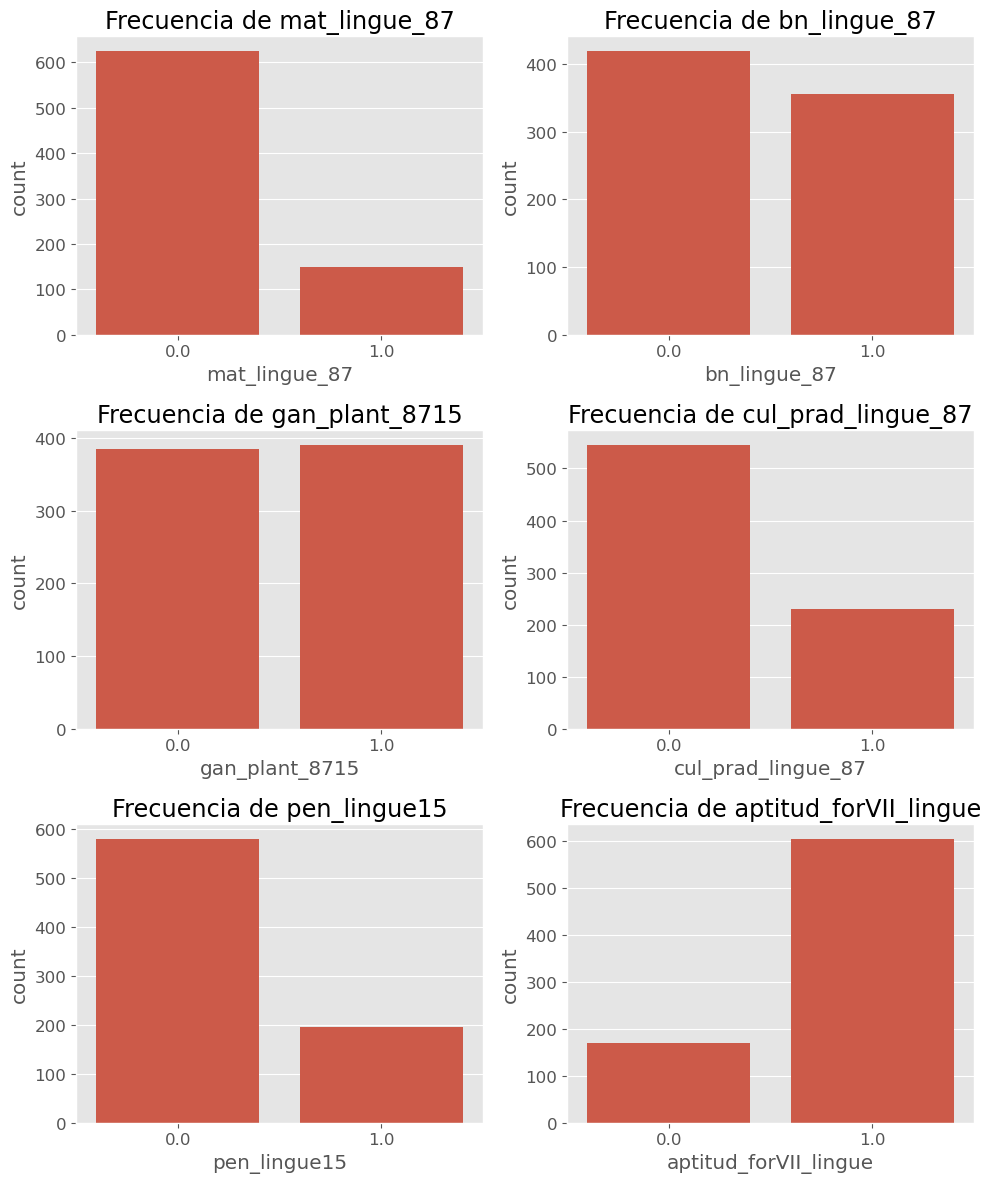

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de tus variables categóricas
cat_vars = ['mat_lingue_87', 'bn_lingue_87', 'gan_plant_8715', "cul_prad_lingue_87","pen_lingue15", "aptitud_forVII_lingue"]

# Crear un grid de subplots
n = len(cat_vars)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows))

for i, var in enumerate(cat_vars):
    ax = axes[i // cols, i % cols]
    sns.countplot(data=datos_modelo_minmax, x=var, ax=ax)
    ax.set_title(f'Frecuencia de {var}')

# Eliminar ejes vacíos si los hay
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()

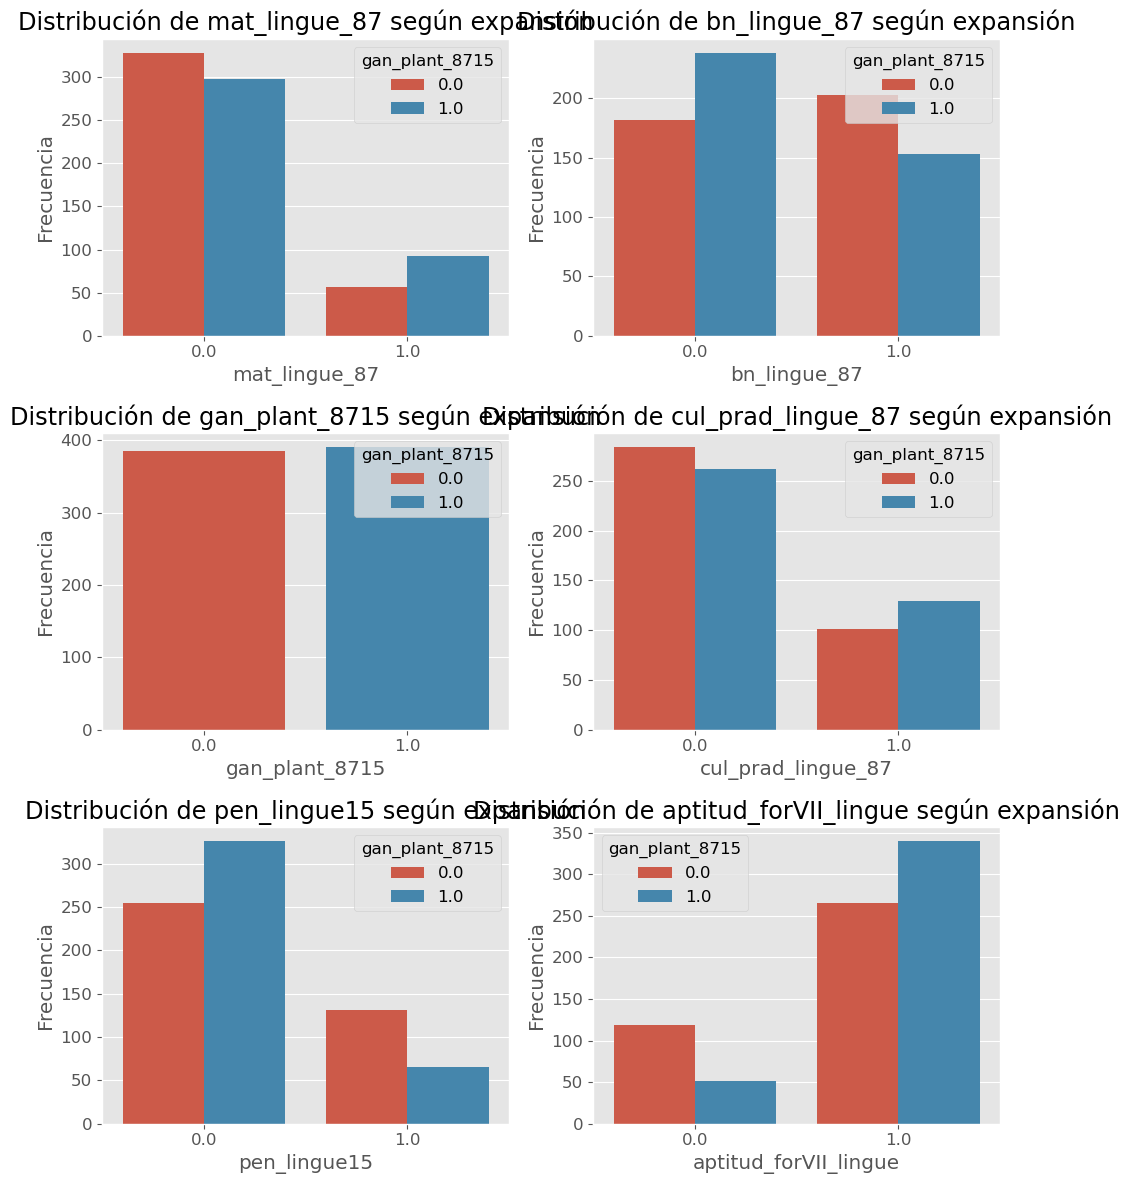

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de tus variables categóricas
cat_vars = [
    'mat_lingue_87', 'bn_lingue_87', 'gan_plant_8715',
    'cul_prad_lingue_87', 'pen_lingue15', 'aptitud_forVII_lingue'
]

# Crear subplots
n = len(cat_vars)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows))

for i, var in enumerate(cat_vars):
    ax = axes[i // cols, i % cols]
    sns.countplot(data=datos_modelo_minmax, x=var, hue='gan_plant_8715', ax=ax)
    ax.set_title(f'Distribución de {var} según expansión')
    ax.set_ylabel('Frecuencia')

# Eliminar ejes vacíos si los hay
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()


In [82]:
datos_categoricos = datos_modelo[["gan_plant_8715","aptitud_forVII_lingue","bn_lingue_87","cul_prad_lingue_87","mat_lingue_87","pen_lingue15"]]
datos_categoricos.head()

,gan_plant_8715,aptitud_forVII_lingue,bn_lingue_87,cul_prad_lingue_87,mat_lingue_87,pen_lingue15
0,0,1.0000,0,0,1,1
1,0,0.0000,0,1,0,1
2,0,0.0000,0,0,0,1
3,0,0.0000,0,1,0,1
4,0,1.0000,1,0,0,0


In [87]:
import pandas as pd

pd.options.display.float_format = '{:.1f}'.format

<Axes: xlabel='mat_lingue_87', ylabel='gan_plant_8715'>

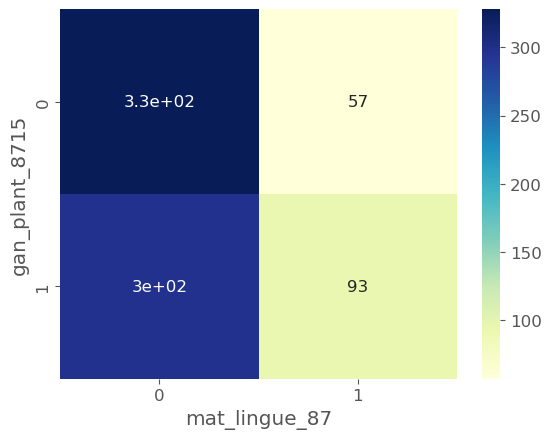

In [88]:
import seaborn as sns
sns.heatmap(pd.crosstab(datos_categoricos['gan_plant_8715'], datos_categoricos['mat_lingue_87']), annot=True, cmap="YlGnBu")

In [53]:
pd.crosstab(datos_categoricos["gan_plant_8715"], datos_categoricos["bn_lingue_87"])

bn_lingue_87,0,1
gan_plant_8715,,
0,182,203
1,238,153


In [62]:
from scipy.stats import chi2_contingency

In [63]:
from scipy.stats import chi2_contingency
tabla = pd.crosstab(datos_categoricos['gan_plant_8715'], datos_categoricos['bn_lingue_87'])
chi2, p, dof, expected = chi2_contingency(tabla)

In [ ]:
print(f'La prueba de chi2 indica que {chi2}, el valor de p {p}, el valor de dof {dof}, y valor esperado {expected}')
# a que se refiere el valor esperado
# que es el dof

La prueba de chi2 indica que 13.901202280441407, el valor de p 0.00019267517996972316, el valor de dof 1, y valor esperado [[208.37628866 176.62371134]
 [211.62371134 179.37628866]]


In [ ]:
ho = no asociacion 
h1 = si asociacion

p < 0.95 o 0.99 s rechaza la hipotosis nula al nivel 0.05 o al nivel 0.99 en el segundo

Si asociacion

### Cramér’s V es una excelente medida para evaluar la fuerza de asociación entre dos variables categóricas. Va de 0 a 1:

### 0 = no hay asociación

### 1 = asociación perfecta

### Valores intermedios indican asociaciones débiles, moderadas o fuertes, dependiendo del contexto



In [66]:
import numpy as np

# Cálculo de Cramér's V
n = tabla.sum().sum()  # total de observaciones
min_dim = min(tabla.shape) - 1

cramers_v = np.sqrt(chi2 / (n * min_dim))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.1338


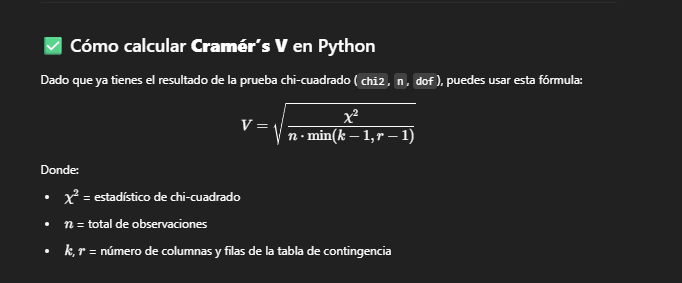

¿Cómo interpretar Cramér’s V?
No hay una regla universal, pero aquí tienes una guía común:

Valor de V	Interpretación aproximada
0.00 – 0.10	Asociación muy débil o nula
0.10 – 0.30	Asociación débil
0.30 – 0.50	Asociación moderada
> 0.50	Asociación fuerte

In [55]:
pd.crosstab(datos_categoricos["gan_plant_8715"], datos_categoricos["aptitud_forVII_lingue"])

aptitud_forVII_lingue,0.0,1.0
gan_plant_8715,,
0,119,266
1,51,340


In [49]:
pd.crosstab(datos_categoricos["gan_plant_8715"], datos_categoricos["cul_prad_lingue_87"])

cul_prad_lingue_87,0,1
gan_plant_8715,,
0,284,101
1,262,129


In [113]:
pd.crosstab(datos_categoricos["gan_plant_8715"], datos_categoricos["mat_lingue_87"])

mat_lingue_87,0,1
gan_plant_8715,,
0,328,57
1,298,93


In [114]:
pd.crosstab(datos_categoricos["gan_plant_8715"], datos_categoricos["pen_lingue15"])

pen_lingue15,0,1
gan_plant_8715,,
0,254,131
1,326,65


Terminar el análisis exploratorio, Outliers, y verificar teoricamente las diferencias entre standatard y minmax, eso deberia mencionarlo en la metodologia. Actualizar la parte metodologica respecto al exploratorio, sobre tiempo, pequeño dashboard con los resultados.

# Análisis variable categorica y variable continua

In [69]:
datos_modelo.head(2)

,gan_plant_8715,aptitud_forVII_lingue,bn_lingue_87,cul_prad_lingue_87,dem_lingue,dis_caminos_lingue,dis_comunidades_lingue,dis_hid_lingue,dis_plant87_lingue,dis_urbano_lingue,mat_lingue_87,pen_lingue15,pend_lingue,predios_lingue1
0,0,1.0,0,0,12,657.951355,3725.802002,30.0,30.00000,14155.20020,1,1,1.317252,1665.0
1,0,0.0,0,1,21,90.000000,8842.267578,60.0,218.40329,24050.06641,0,1,8.836393,42.0


Resultados:
Grupo 0 (expansion = 0):
Estadístico de Shapiro: 0.888

p-valor: 3.80 × 10⁻¹⁶ (muy pequeño)

Grupo 1 (expansion = 1):
Estadístico de Shapiro: 0.952

p-valor: 5.45 × 10⁻¹⁰ (muy pequeño)

En ambos grupos, los p-valores son muchísimo menores que 0.05, lo que significa que rechazamos la hipótesis nula de normalidad.

Es decir, la altitud no sigue una distribución normal ni en el grupo 0 ni en el grupo 1.

In [71]:
from scipy.stats import shapiro

grupo0 = datos_modelo[datos_modelo['gan_plant_8715'] == 0]['dem_lingue']
grupo1 = datos_modelo[datos_modelo['gan_plant_8715'] == 1]['dem_lingue']

print("Normalidad grupo 0:", shapiro(grupo0))
print("Normalidad grupo 1:", shapiro(grupo1))

Normalidad grupo 0: ShapiroResult(statistic=np.float64(0.8880880616528855), pvalue=np.float64(3.7955647002408007e-16))
Normalidad grupo 1: ShapiroResult(statistic=np.float64(0.9518304064677211), pvalue=np.float64(5.452409888575895e-10))


In [72]:
from scipy.stats import levene

print(levene(grupo0, grupo1))

LeveneResult(statistic=np.float64(24.239053920796014), pvalue=np.float64(1.0404019964214405e-06))


In [73]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(grupo0, grupo1)
print(f"T-test: t={t_stat:.3f}, p={p_val:.4f}")

T-test: t=-1.947, p=0.0518


In [ ]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(grupo0, grupo1, alternative = 'two-sided')
print(f"Mann-Whitney U: U={u_stat}, p={p_val:.4f}")

Mann-Whitney U: U=63242.5, p=0.0001


In [76]:
u_stat, p_val = mannwhitneyu(grupo0, grupo1, alternative='two-sided')

# Calcular Z aproximado
n1 = len(grupo0)
n2 = len(grupo1)
mean_U = n1 * n2 / 2
std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
z = (u_stat - mean_U) / std_U

# Efecto r
r = z / np.sqrt(n1 + n2)
print(f"Efecto r = {r:.3f}")

Efecto r = -0.138


Por qué puede ser negativo?
El signo del r depende de cómo se ordenaron los grupos al hacer el test.

El estadístico Z puede ser positivo o negativo, dependiendo de si el grupo 1 tiene valores más altos o más bajos que el grupo 0.

Pero como el Mann-Whitney U no asume dirección, el valor absoluto de r es lo que nos interesa.


Interpretación correcta:
r = 0.138 (toma el valor absoluto → |−0.138| = 0.138)

Esto representa un efecto pequeño, según la escala de Cohen:

0.1 → pequeño

0.3 → mediano

0.5 → grande


Conclusión:
Sí puede ser negativo, pero para interpretar el tamaño del efecto, usa el valor absoluto.

En tu caso:

Hay una diferencia estadísticamente significativa en altitud entre los grupos,
pero el tamaño del efecto es pequeño → la diferencia, aunque real, no es muy fuerte.

Diferencias en alternative:
alternative='two-sided' (dos colas, por defecto):
La hipótesis alternativa es que las distribuciones de los dos grupos son diferentes, sin especificar cuál es mayor o menor.

“¿Existe alguna diferencia en la distribución entre grupo0 y grupo1?”

alternative='less':
La hipótesis alternativa es que la distribución del primer grupo (grupo0) es menor que la del segundo grupo (grupo1), es decir, los valores en grupo0 tienden a ser menores que en grupo1.

“¿Los valores del grupo0 son menores que los del grupo1?”

alternative='greater':
La hipótesis alternativa es que la distribución del primer grupo (grupo0) es mayor que la del segundo grupo (grupo1), es decir, los valores en grupo0 tienden a ser mayores que en grupo1.

“¿Los valores del grupo0 son mayores que los del grupo1?”